# U.S. Medical Insurance Costs

In [1]:
import pandas as pd

### Explore the data

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
def avg_age(ages):
    return sum(ages)/len(ages)

In [34]:
print(df.age.mean())
print(avg_age(df.age))

39.20702541106129
39.20702541106129


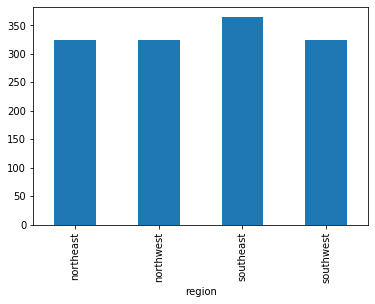

In [60]:
df[['region','age']].groupby('region').count().plot.bar(legend = False)

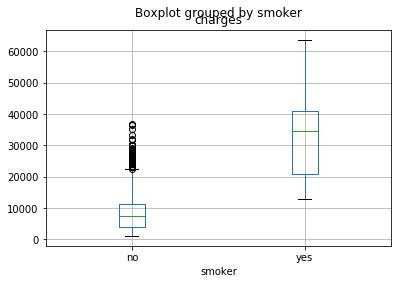

In [49]:
df.boxplot(by = 'smoker', column = 'charges')

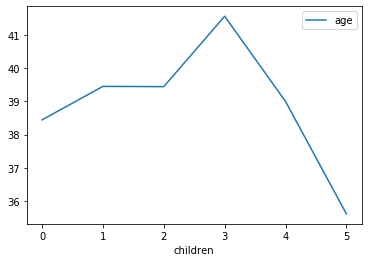

In [50]:
df[['age', 'children']].groupby('children').mean().plot()

In [26]:
class Patient:
    def __init__(self, age, sex, bmi, children, smoker, region, charges):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.children = children
        self.smoker = smoker
        self.region = region
        self.charges = charges
        


In [17]:
patient1 = Patient(18, 1, 21, 1, 1, 'southwest', 16884.924)

In [18]:
print(patient1.estimated_insurance_cost())

24067


In [20]:
from marshmallow import Schema, fields, post_load
from pprint import pprint

In [27]:
class PatientSchema(Schema):
    age = fields.Integer()
    sex = fields.String()
    bmi = fields.Float()
    children = fields.Integer()
    smoker = fields.String()
    region = fields.String()
    charges = fields.Float()
    
    def make(self, data, **kwargs):
        return Patient(**data)

In [28]:
df[:3].to_dict('records')

[{'age': 19,
  'sex': 'female',
  'bmi': 27.9,
  'children': 0,
  'smoker': 'yes',
  'region': 'southwest',
  'charges': 16884.924},
 {'age': 18,
  'sex': 'male',
  'bmi': 33.77,
  'children': 1,
  'smoker': 'no',
  'region': 'southeast',
  'charges': 1725.5523},
 {'age': 28,
  'sex': 'male',
  'bmi': 33.0,
  'children': 3,
  'smoker': 'no',
  'region': 'southeast',
  'charges': 4449.462}]

In [29]:
schema = PatientSchema()
patients = schema.load(df[:3].to_dict('records'), many = True)

In [32]:
patient1 = patients[0]
patient1.region

AttributeError: 'dict' object has no attribute 'region'

In [ ]:
data = [{
    'name': 'Alice',
    'age': 20
}, {
    'name': 'Bob',
    'age': 25
}, {
    'name': 'Chris',
    'age': 32
}]
schema = UserSchema()
users = schema.load(data, many=True)